***

<font color='green'>

# Project Solution: EDA and Statistical Learning
### Dataset: insurance.csv
### Data consists of medical costs of people characterized by certain attributes  
### Purpose: Deep dive into data by performing EDA and testing of hypotheses pertaining to the dataset  
***
***
*Prepared by: Sauvik De*

*Date: June 20, 2020*
    
</font>

***

In [1]:
# 1a) Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1b) Define user-defined functions
def fmtNum(num, ndigits):
    '''
    Function to format numbers (scientific, or others) - round-like function
    '''
    if( (isinstance(num,float) | isinstance(num,int)) & (isinstance(ndigits,float) | isinstance(ndigits,int)) ):
        if(str(num).find('e') > 0):
            return float(str(round(float(str(num)[:str(num).find('e')]), ndigits=ndigits)) + str(num)[str(num).find('e'):])
        else:
            return round(num, ndigits=ndigits)
    else:
        raise Exception('function *fmtNum*: Input must be a single numeric')

        
def ecdf(data):
    '''
    Function to return Empirical Cumulative Distribution for a given input array
    '''
    if( isinstance(data, (list,tuple,pd.Series,np.ndarray)) ):
        data = np.array(data)
    if( data.ndim==1 ):
        x = np.sort(data)
        y = np.arange(len(x))/len(x)
        return(x,y)
    else:
        raise Exception('function *ecdf*: Input must be 1d and be either list, tuple, numpy array or pandas series.')

In [2]:
# 2) Read healthcare data as dataframe and store it into a variable called 'insurance'
# Note: The datafile 'insurance.csv' is stored under the same folder as that of this ipynb notebook
insurance = pd.read_csv('insurance.csv', sep=',', header=0)

***
### Basic EDA
***

In [3]:
# 3a) Shape of dataframe
print('Input data is of type:', type(insurance))
print('Number of rows:', insurance.shape[0], ' and, Number of columns:', insurance.shape[1])
print('Note: This is a pandas dataframe containing 1338 rows and 7 columns.')

Input data is of type: <class 'pandas.core.frame.DataFrame'>
Number of rows: 1338  and, Number of columns: 7
Note: This is a pandas dataframe containing 1338 rows and 7 columns.


In [4]:
# 3b) Datatype of each attribute:
print(insurance.dtypes)
print("\nNote: As determined by Python, variables 'age' and 'childern' are integer-value type; while, variables 'bmi' and 'charges' are of float type; variables 'sex', 'smoker' and 'region' are categorical.")
print("\nFrom analysis perspective, variables 'age', 'bmi' and 'charges' can be thought of numerical variables; while variables 'sex', 'smoker' and 'region' are nominal categorical variables. Although integer type, variable 'children' can actually be thought of ordinal categorical variable. We can use Label-encoding or One-Hot-Encoding to make the categorical variables numerical for modelling purpose at a later stage of data analysis.")

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Note: As determined by Python, variables 'age' and 'childern' are integer-value type; while, variables 'bmi' and 'charges' are of float type; variables 'sex', 'smoker' and 'region' are categorical.

From analysis perspective, variables 'age', 'bmi' and 'charges' can be thought of numerical variables; while variables 'sex', 'smoker' and 'region' are nominal categorical variables. Although integer type, variable 'children' can actually be thought of ordinal categorical variable. We can use Label-encoding or One-Hot-Encoding to make the categorical variables numerical for modelling purpose at a later stage of data analysis.


In [5]:
# 3c) Checking presence of missing values
print('\nNo. of missing values by features:')
print(insurance.isnull().sum(axis=0))
print('\nNote: None of the features contain missing values!')


No. of missing values by features:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Note: None of the features contain missing values!


In [6]:
# 3a-3c) Alternative approach: Shape, Datatypes and Missing values count all at one go!
print(insurance.info())
print('\nThis confirms the same result as before!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

This confirms the same result as before!


In [7]:
# 3d) 5-point summary of numerical attributes (including count, mean and sd)
print('\nBelow is a 5-number summary (including count, mean and sd) of \'insurance\' dataset:\n', insurance.describe().round(decimals=2))
print('\nInsight 1: variable \'age\' looks symmetric as quartiles (first, second and third) look roughly equidistant; Data ranging from 18 to 64 years with sample average being almost equal to the median (39).')
print('\nInsight 2: variable \'bmi\' looks symmetric too as quartiles (first, second and third) look roughly equidistant; sample average again being almost equal to the median (30) with BMI ranging from ~16 to ~53. Notably the sample BMI well exceeds the standard ideal range of BMI of 18.5 to 24.9 kg/m^2. This may be due to the presence of overwieght / obese people in the sample.')
print('\nInsight 3: variable \'children\' seems to have right-skewness in the data (skewness direction somewhat expected), since samples with children count from minimum to the first quartile range all equal 0 and median being 1; while max number of children in the sample being 5.')
print('\nInsight 4: variable \'charges\' also does seem to have right-skewness in the data with the max value (~63770) being quite large (~4x relative to Q3!) and being very distant from both the median (~9382) and the third quartile (~16640).')


Below is a 5-number summary (including count, mean and sd) of 'insurance' dataset:
            age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43

Insight 1: variable 'age' looks symmetric as quartiles (first, second and third) look roughly equidistant; Data ranging from 18 to 64 years with sample average being almost equal to the median (39).

Insight 2: variable 'bmi' looks symmetric too as quartiles (first, second and third) look roughly equidistant; sample average again being almost equal to the median (30) with BMI ranging from ~16 to ~53. Notably the sample BMI well exceeds the standard ideal range of BMI of 18.5 to 24.9 kg/m^2. This may be due to the


The below histogram of 'bmi' shows the distribution is symmetric and close to Normal distribution. The boxplot confirms the same too except a few datapoints lying above the upper whisker.


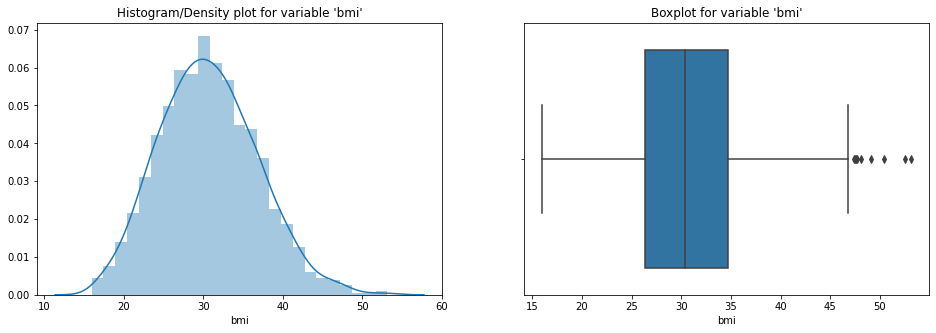

In [8]:
# 3e) Distribution of 'bmi' column
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(a=insurance['bmi'], hist=True, kde=True, rug=False, ax=ax[0]).set_title("Histogram/Density plot for variable 'bmi'")
sns.boxplot(x=insurance['bmi'], ax=ax[1]).set_title("Boxplot for variable 'bmi'")
print('\nThe below histogram of \'bmi\' shows the distribution is symmetric and close to Normal distribution. The boxplot confirms the same too except a few datapoints lying above the upper whisker.')


The below histogram of 'age' shows it is uniformly distributed across all range of ages except around 20 years where the mode appears. The boxplot gives an impression of a very symmetric distribution (which is true for uniform distribution too).


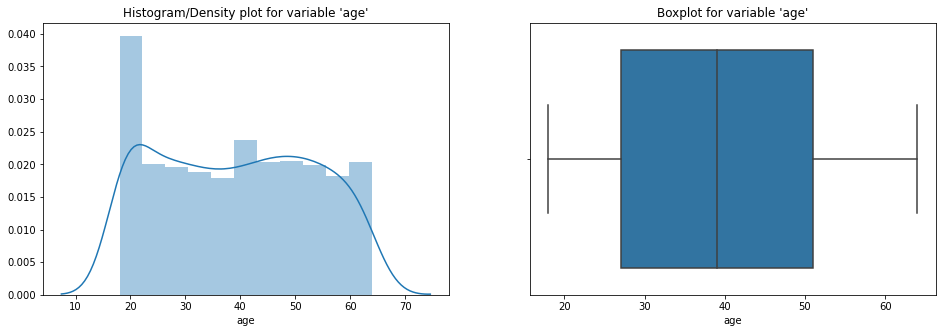

In [9]:
# 3e) Distribution of 'age' column
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(a=insurance['age'], hist=True, kde=True, rug=False, ax=ax[0]).set_title("Histogram/Density plot for variable 'age'")
sns.boxplot(x=insurance['age'], ax=ax[1]).set_title("Boxplot for variable 'age'")
print('\nThe below histogram of \'age\' shows it is uniformly distributed across all range of ages except around 20 years where the mode appears. The boxplot gives an impression of a very symmetric distribution (which is true for uniform distribution too).')


The below histogram of 'charges' clearly shows the distribution is right-skewed. The boxplot confirms the same.


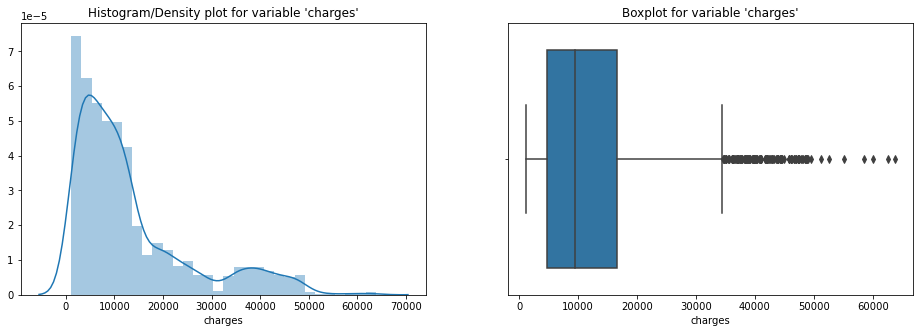

In [10]:
# 3e) Distribution of 'charges' column
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(a=insurance['charges'], hist=True, kde=True, rug=False, ax=ax[0]).set_title("Histogram/Density plot for variable 'charges'")
sns.boxplot(x=insurance['charges'], ax=ax[1]).set_title("Boxplot for variable 'charges'")
print('\nThe below histogram of \'charges\' clearly shows the distribution is right-skewed. The boxplot confirms the same.')

In [11]:
# 3f) Measure of skewness of 'bmi', 'age' and 'charges' columns
print("\nSkewness (unbiased) of column 'bmi':", fmtNum(insurance['bmi'].skew(), 4))
print("Skewness (unbiased) of column 'age':", fmtNum(insurance['age'].skew(), 4))
print("Skewness (unbiased) of column 'charges':", fmtNum(insurance['charges'].skew(), 4))
print("\nVariable 'age' looks near-symmetric with skewness close to 0, while variable 'bmi' is still fairly symmetric.\nHowever, variable 'charges' seems to be highly skewed towards right (skewness > 1).")


Skewness (unbiased) of column 'bmi': 0.284
Skewness (unbiased) of column 'age': 0.0557
Skewness (unbiased) of column 'charges': 1.5159

Variable 'age' looks near-symmetric with skewness close to 0, while variable 'bmi' is still fairly symmetric.
However, variable 'charges' seems to be highly skewed towards right (skewness > 1).



Since variable 'bmi' is near-normal (from histogram plot as shown earlier), any datapoint lying beyond 1.5*IQR above Q3 or below Q1 may be considered as outlier. In our case, from the boxplot below, we notice outliers are on the higher side and the calculated threshold for the same is 47.29.
Count of outlier 'bmi' datapoints is 9.

Since variable 'age' looks symmetric, roughly any datapoint lying beyond 1.5*IQR above Q3 or below Q1 may be considered as outlier. In our case, from the boxplot below, there are no datapoints outside the upper or lower whisker and hence no outlier.

Both histogram (as shown earlier) and boxplot for variable 'charges' clearly depict a right-skewed distribution. Also looking at the boxplot, we can find the datapoints beyond 1.5*IQR above Q3 and hence those can roughly be considered as outliers.
Calculated upper threshold for outlier (Q3+1.5*IQR) = 34489.0
Count of 'approximate' outliers for 'charges' variable is 139

Note: The treatment of outliers may be a 

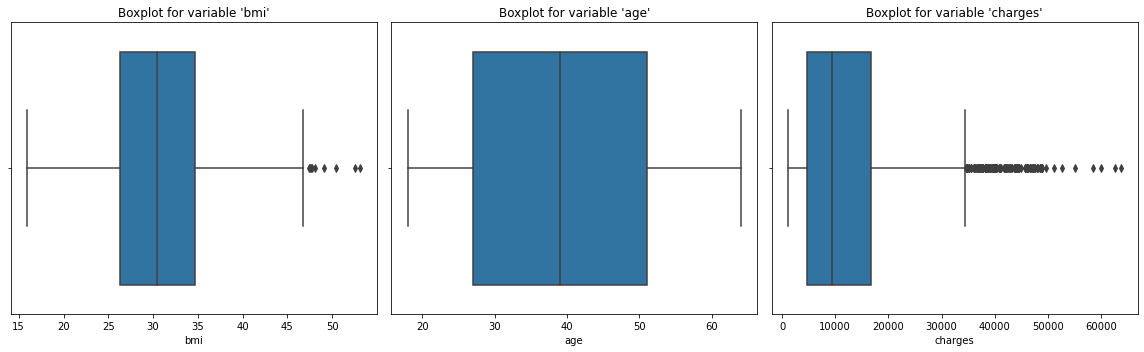

In [12]:
# 3g) Checking the presence of outliers in 'bmi', 'age' and 'charges' columns
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
sns.boxplot(insurance['bmi'], ax=ax[0]).set_title("Boxplot for variable 'bmi'")
sns.boxplot(insurance['age'], ax=ax[1]).set_title("Boxplot for variable 'age'")
sns.boxplot(insurance['charges'], ax=ax[2]).set_title("Boxplot for variable 'charges'")
plt.tight_layout()

bmi_upper_threshold = insurance['bmi'].quantile(0.75) + 1.5*(insurance['bmi'].quantile(0.75) - insurance['bmi'].quantile(0.25))
print("\nSince variable 'bmi' is near-normal (from histogram plot as shown earlier), any datapoint lying beyond 1.5*IQR above Q3 or below Q1 may be considered as outlier. In our case, from the boxplot below, we notice outliers are on the higher side and the calculated threshold for the same is ", fmtNum(bmi_upper_threshold,2), ".", sep="")
print("Count of outlier 'bmi' datapoints is ", (insurance['bmi']>bmi_upper_threshold).sum(), ".", sep="")

print("\nSince variable 'age' looks symmetric, roughly any datapoint lying beyond 1.5*IQR above Q3 or below Q1 may be considered as outlier. In our case, from the boxplot below, there are no datapoints outside the upper or lower whisker and hence no outlier.")

charges_upper_threshold = insurance['charges'].quantile(0.75) + 1.5*(insurance['charges'].quantile(0.75) - insurance['charges'].quantile(0.25))
print("\nBoth histogram (as shown earlier) and boxplot for variable 'charges' clearly depict a right-skewed distribution. Also looking at the boxplot, we can find the datapoints beyond 1.5*IQR above Q3 and hence those can roughly be considered as outliers.")
print("Calculated upper threshold for outlier (Q3+1.5*IQR) =", fmtNum(charges_upper_threshold,0))
print("Count of 'approximate' outliers for 'charges' variable is", (insurance['charges']>charges_upper_threshold).sum())
print("\nNote: The treatment of outliers may be a part of data cleaning or any model building algorithm. However, any outlier shouldn't blindly be deleted as it may provide important insight about the variability in the dataset. So it needs domain knowledge coupled with Statistical technique to handle outliers be either remove those, or transform those, or retain those on a case-by-case basis.")


Insights:
1) Sample has almost equal proportion between male and female.
2) There are more non-smokers (~4x) than smokers in the sample.
3) Beneficiaries are almost equally likely from northeast, northwest and southwest regions; while those from southeast are slightly higher in proportion versus the rests.
4) Majority of the beneficiaries from the sample do not have any dependents. The number of beneficiaries steadily decreases as the number of their dependents increases from 1 through 5.


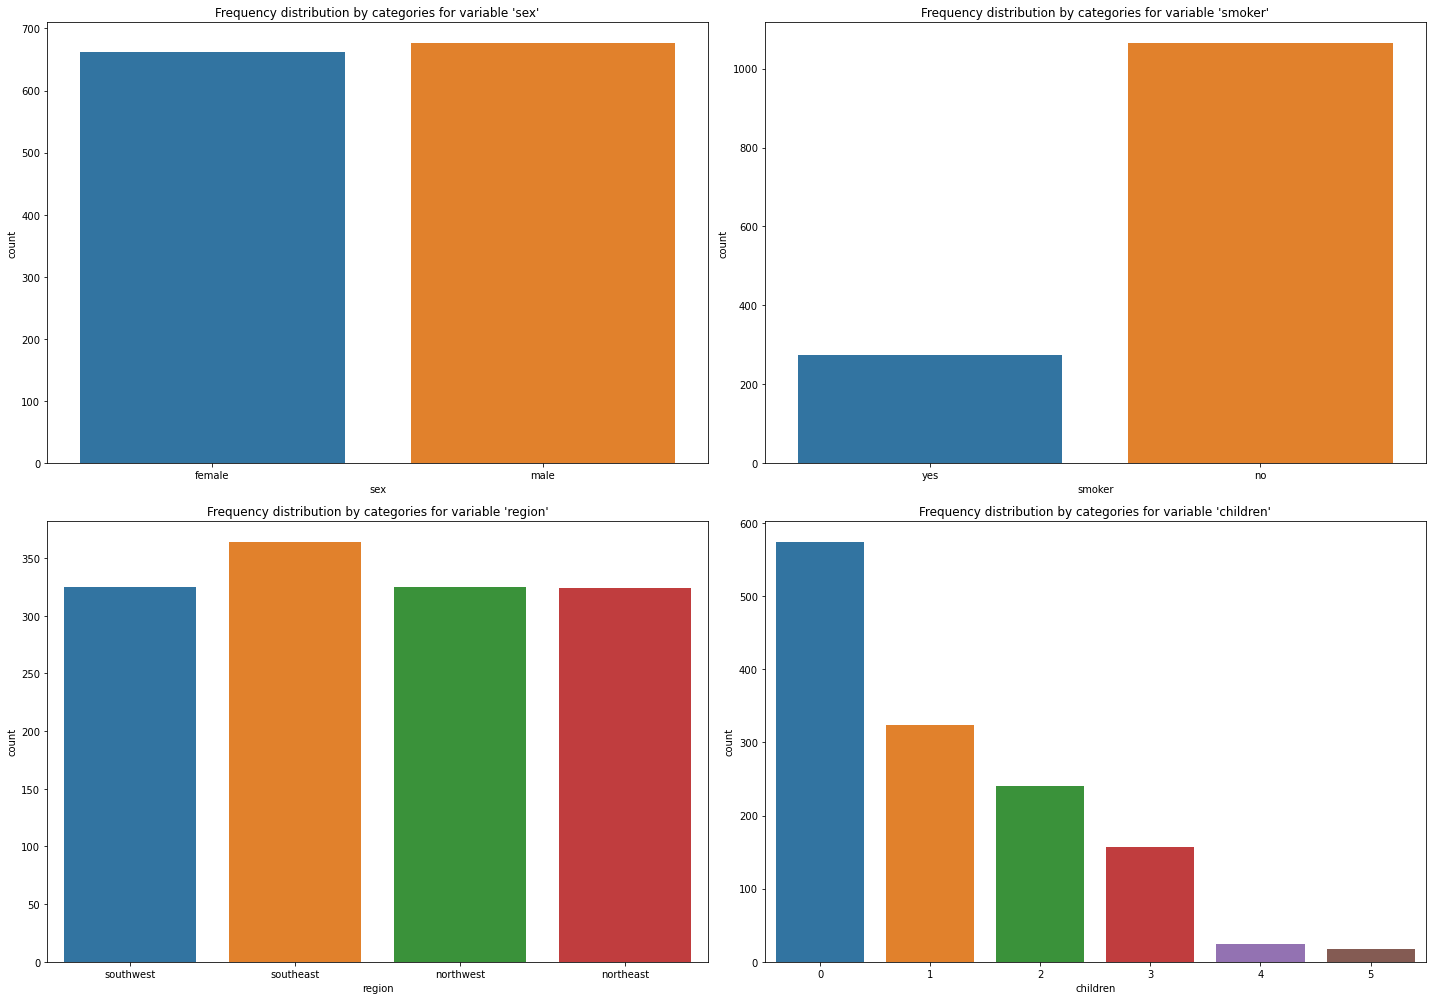

In [13]:
# 3h) Distribution of categorical columns (include children)
# Thoughts: We could alternatively look at proportion plots (rather than count plots) using value_counts(normalize=True).
fig, ax = plt.subplots(2, 2, figsize=(20, 14))
catcols = list(insurance.columns[insurance.dtypes == 'object'])
catcols.append('children')

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.countplot(insurance[catcols[i*ax.shape[1]+j]], ax=ax[i][j]).set_title("Frequency distribution by categories for variable '{}'".format(catcols[i*ax.shape[1]+j]))

plt.tight_layout()

print("\nInsights:\n1) Sample has almost equal proportion between male and female.")
print("2) There are more non-smokers (~4x) than smokers in the sample.")
print("3) Beneficiaries are almost equally likely from northeast, northwest and southwest regions; while those from southeast are slightly higher in proportion versus the rests.")
print("4) Majority of the beneficiaries from the sample do not have any dependents. The number of beneficiaries steadily decreases as the number of their dependents increases from 1 through 5.")


Insights:
1) As expected, there seems to have some correlation between variables 'age' and 'charges', however the relationship may be conditional on other attributes as there seems to have some distinct splits/groups.
2) It is evident from the diagonal plots that the distributions of variables 'age', 'bmi', 'children' and 'charges' hardly differ across males and females.
3) There doesn't seem to have any apparent correlation between 'age' and 'bmi'. Same goes true for variables 'charges' and 'bmi'.
4) As the number of children/dependents tends to be more, the charges tends to be lesser, espeically when number of children/dependents is 5.


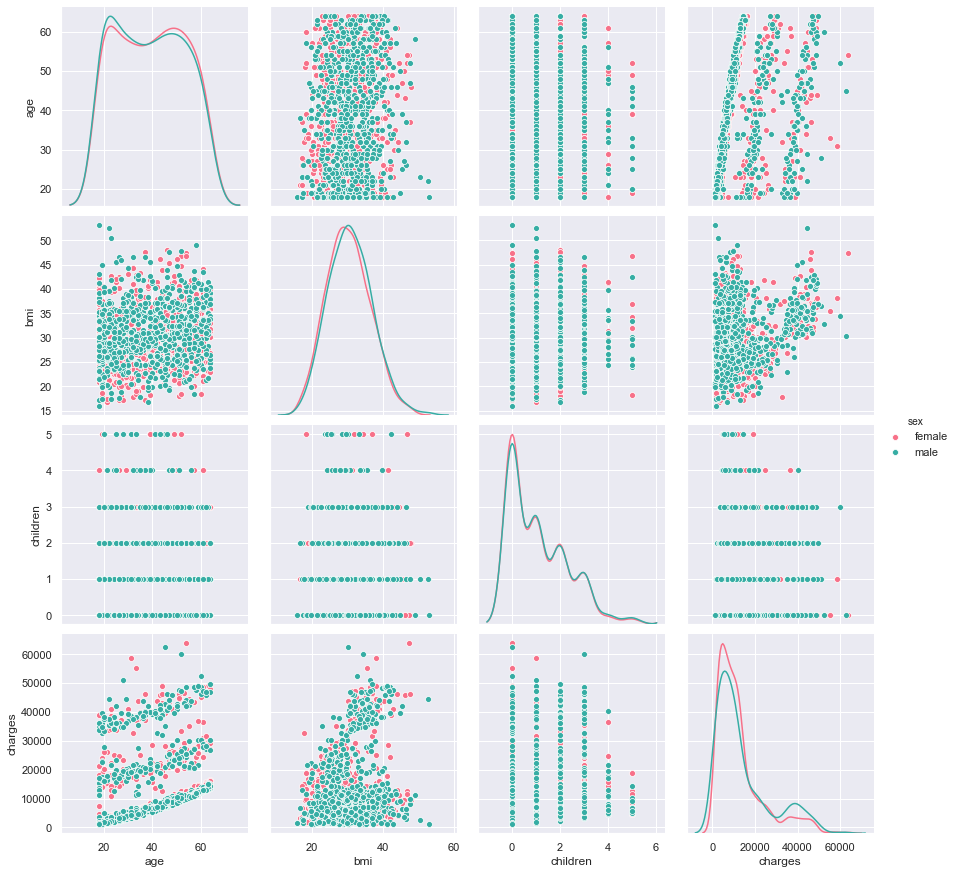

In [14]:
# 3i) Pair plot that includes all the columns of the dataframe
# There are 4 numeric columns and 3 categorical columns (although column 'children' can also be considered categorical)
# One way to include all the columns in a pairplot would be to represent 3 categorical columns using color, size and shape
# But here I decide to make it bit simpler, i.e., using three sets of pairplots:
# 1) first set with all numerical variables with 'sex' as hue variable (in color)
# 2) second set with all numerical variables with 'smoker' as hue variable (in color)
# 3) third set with all numerical variables with 'region' as hue variable (in color)
# 4) The pairwise comparison of sex, smoker and region variables [categorical vs categorical]
#***********************************************************************************************

#*********************************************************************
# 3i.1) Pairplot of numerical columns conditioned on variable 'sex'
#*********************************************************************
sns.set()
sns.pairplot(insurance, hue='sex', diag_kind='kde', palette='husl', height=3, plot_kws={'edgecolor':'white'}, diag_kws={'shade':False})

print("\nInsights:\n1) As expected, there seems to have some correlation between variables 'age' and 'charges', however the relationship may be conditional on other attributes as there seems to have some distinct splits/groups.")
print("2) It is evident from the diagonal plots that the distributions of variables 'age', 'bmi', 'children' and 'charges' hardly differ across males and females.")
print("3) There doesn't seem to have any apparent correlation between 'age' and 'bmi'. Same goes true for variables 'charges' and 'bmi'.")
print("4) As the number of children/dependents tends to be more, the charges tends to be lesser, espeically when number of children/dependents is 5.")


Insights:
1) It is evident that variable 'smoker' clearly segregates the 'charges' data; Notably smokers had to pay higher medical costs (i.e., charges) versus non-smokers. Interestingly there seems to have a bi-modal distribution of charges for 'smoker' group.
2) BMI for non-smokers seem to be slightly higher versus smokers.
3) BMI for smokers tend to have a linear relationship (on positive direction) with charges.
4) Also, it is evident that age tends to have a linear relationship (on positive direction) with charges conditioned on smoking habits.


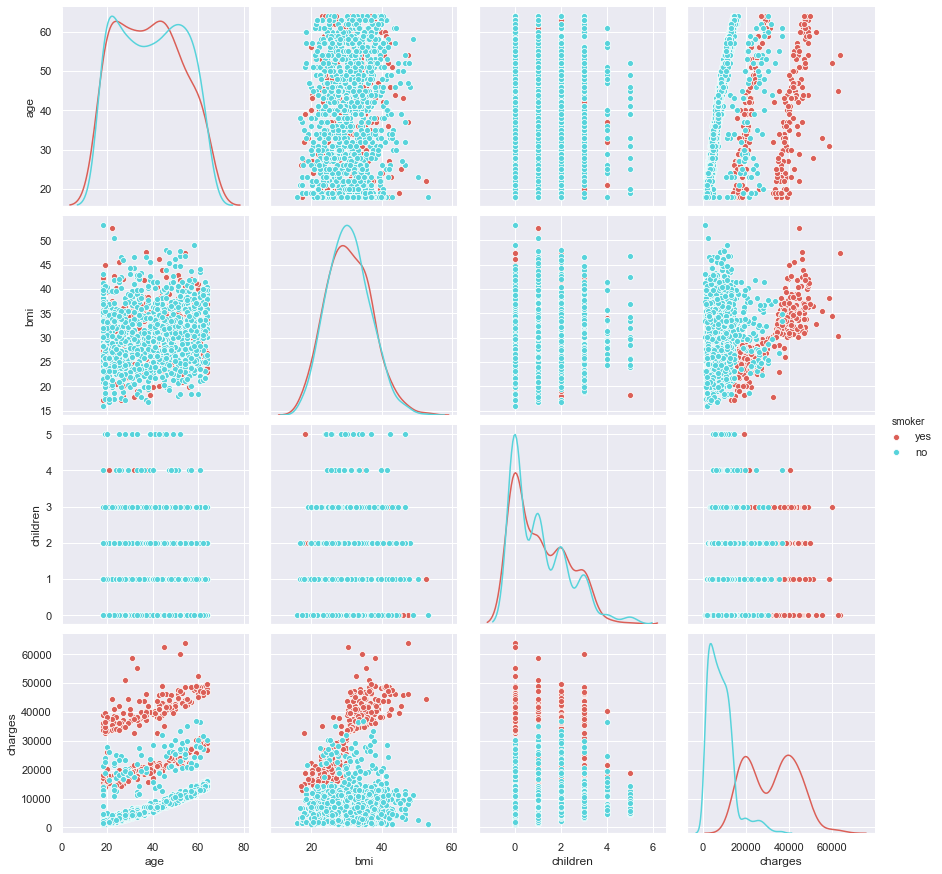

In [15]:
#*********************************************************************
# 3i.2) Pairplot of numerical columns conditioned on variable 'smoker'
#*********************************************************************
sns.set()
sns.pairplot(insurance, hue='smoker', palette='hls', height=3, plot_kws={'edgecolor':'white'}, diag_kws={'shade':False})

print("\nInsights:\n1) It is evident that variable 'smoker' clearly segregates the 'charges' data; Notably smokers had to pay higher medical costs (i.e., charges) versus non-smokers. Interestingly there seems to have a bi-modal distribution of charges for 'smoker' group.") 
print("2) BMI for non-smokers seem to be slightly higher versus smokers.")
print("3) BMI for smokers tend to have a linear relationship (on positive direction) with charges.")
print("4) Also, it is evident that age tends to have a linear relationship (on positive direction) with charges conditioned on smoking habits.")


Insights:
1) Residents from SouthEast region tend to have marginally higher BMI than the rest of the regions.
2) Also, in general, it seems the charges for residents increase linearly with age even within each region.


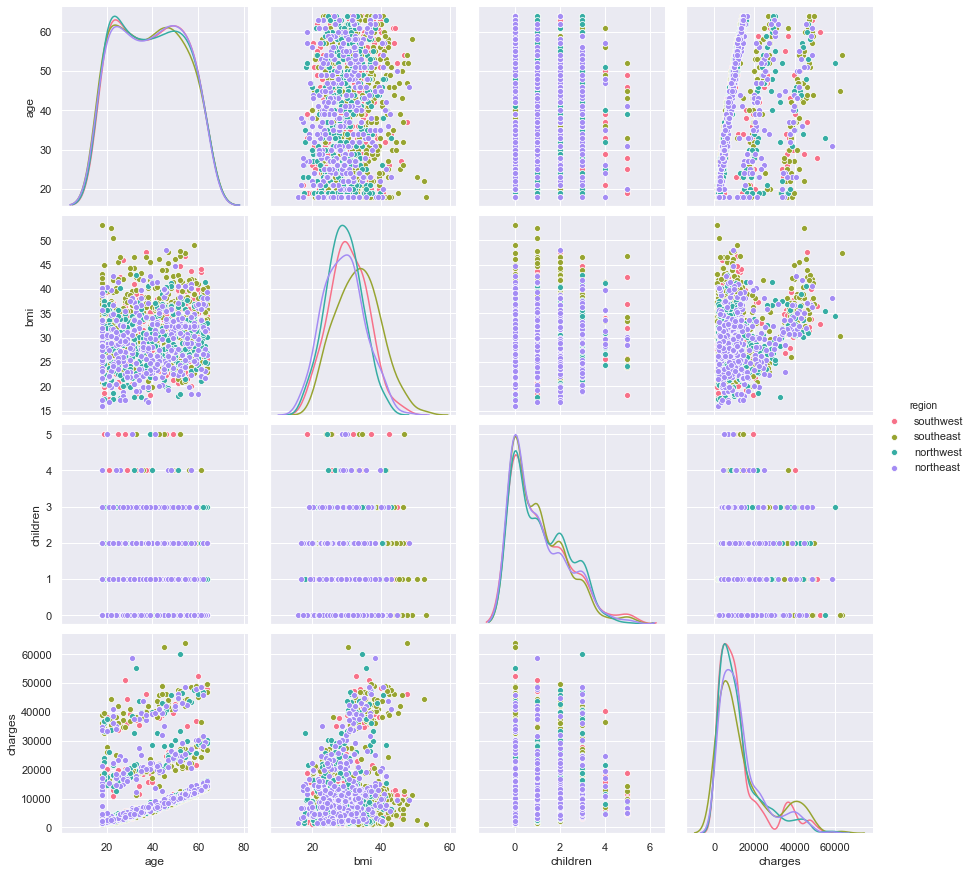

In [16]:
#**********************************************************************
# 3i.3) Pairplot of numerical columns conditioned on variable 'region'
#**********************************************************************
sns.set()
sns.pairplot(insurance, hue='region', palette='husl', height=3, plot_kws={'edgecolor':'white'}, diag_kws={'shade':False})

print("\nInsights:\n1) Residents from SouthEast region tend to have marginally higher BMI than the rest of the regions.") 
print("2) Also, in general, it seems the charges for residents increase linearly with age even within each region.")


Insights:
1) There is not much to choose among regions based on proportion between male and female residents except for SouthEast region where male proportion being slightly higher.
2) There are more non-smokers than smokers within each of the four regions.
3) When it comes to smoking pattern by gender, there are more male smokers than females for the sample at hand.


<Figure size 1152x360 with 0 Axes>

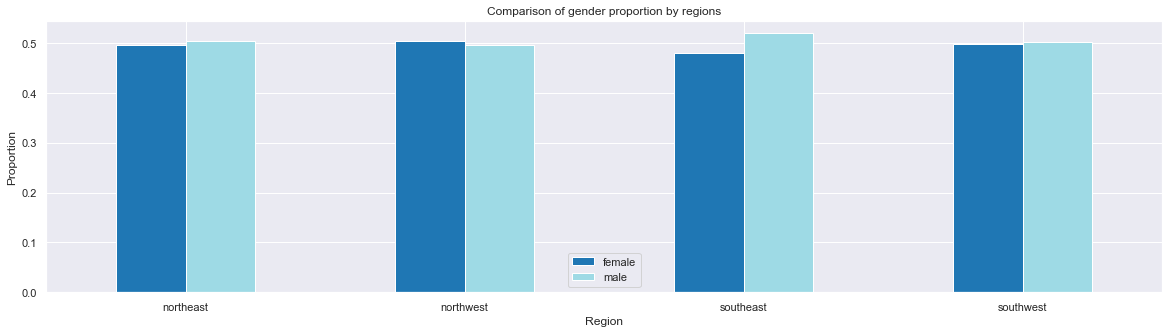

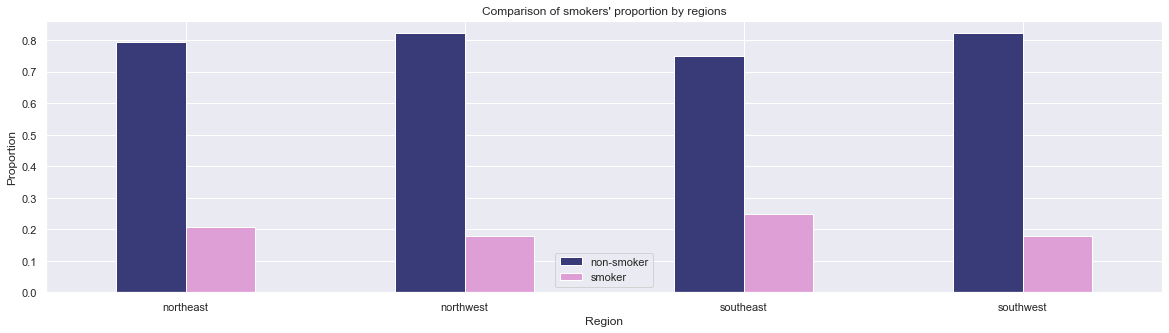

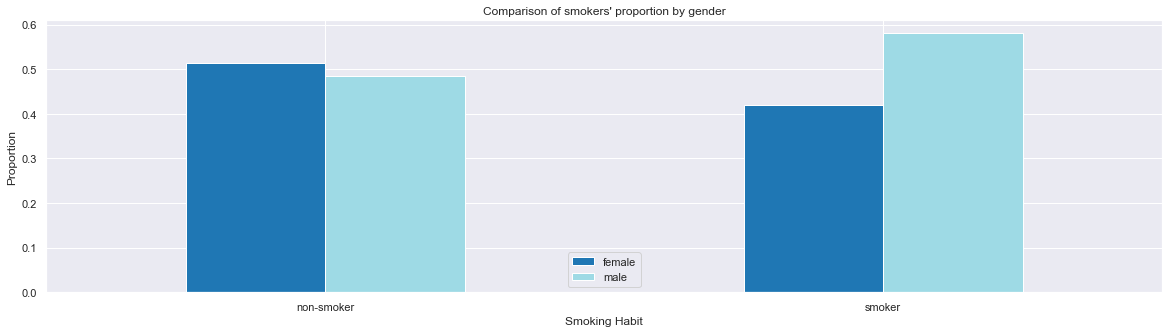

In [17]:
#***********************************************************************************************
# 3i.4) The pairwise comparison of sex, smoker and region variables [categorical vs categorical]
#***********************************************************************************************
plt.figure(figsize=(16,5))
propbyRegionSex = insurance.groupby(['region'])['sex'].value_counts(normalize=True)
propbyRegionSex.unstack().plot(kind='bar', stacked=False, figsize=(20,5), colormap='tab20', rot=0)
plt.title('Comparison of gender proportion by regions')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.legend(loc='lower center')

propbyRegionSmoker = insurance.groupby(['region'])['smoker'].value_counts(normalize=True)
propbyRegionSmoker.unstack().plot(kind='bar', stacked=False, figsize=(20,5), colormap='tab20b', rot=0)
curHand, curLabl = plt.gca().get_legend_handles_labels()
plt.title("Comparison of smokers' proportion by regions")
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.legend(loc='lower center', labels=[{'no':'non-smoker', 'yes':'smoker'}[i] for i in curLabl])

propbySmokerSex = insurance.groupby(['smoker'])['sex'].value_counts(normalize=True)
propbySmokerSex.unstack().plot(kind='bar', stacked=False, figsize=(20,5), colormap='tab20', rot=0)
xlab = propbySmokerSex.unstack().index
plt.xticks(np.arange(len(propbySmokerSex.unstack().index)), [{'no':'non-smoker', 'yes':'smoker'}[i] for i in xlab])
plt.title("Comparison of smokers' proportion by gender")
plt.xlabel('Smoking Habit')
plt.ylabel('Proportion')
plt.legend(loc='lower center')

print("\nInsights:\n1) There is not much to choose among regions based on proportion between male and female residents except for SouthEast region where male proportion being slightly higher.")
print("2) There are more non-smokers than smokers within each of the four regions.")
print("3) When it comes to smoking pattern by gender, there are more male smokers than females for the sample at hand.")


Insights:
1) Average charges seem to have dropped for individuals having 4 or 5 children/dependents.
2) Average BMI (and possibly Age, except children=5 case) don't seem to vary much across cohorts with varying number of children/dependents.


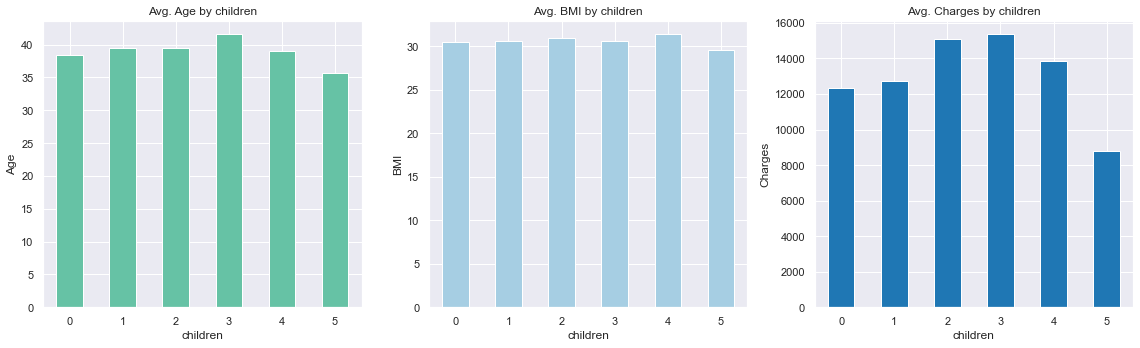

In [18]:
# Addendum to question #3i
# Although variable 'Children' contains numbers from 1 to 5, it should be considered as a categorical variable
# Note: This is just a quick look at the average metrics for various categories of Children
# Age vs Children, BMI vs Children, Charges vs Children

fig, ax = plt.subplots(1, 3, figsize=(16,5))
a = insurance.groupby(['children'])[['bmi','age','charges']].aggregate('mean')#.plot(kind='bar', stacked=True, figsize=(20,5), colormap='Set2')
a['age'].plot(kind='bar', colormap='Set2', ax=ax[0], title='Avg. Age by children', rot=0).set_ylabel('Age')
a['bmi'].plot(kind='bar', colormap='Paired', ax=ax[1], title='Avg. BMI by children', rot=0).set_ylabel('BMI')
a['charges'].plot(kind='bar', colormap='tab20', ax=ax[2], title='Avg. Charges by children', rot=0).set_ylabel('Charges')
plt.tight_layout()
print("\nInsights:\n1) Average charges seem to have dropped for individuals having 4 or 5 children/dependents.")
print("2) Average BMI (and possibly Age, except children=5 case) don't seem to vary much across cohorts with varying number of children/dependents.")

***
### Hypothesis Testing
***
#### 4a) Do charges of people who smoke differ significantly from the people who don't?
**Approach**: We have two groups of people based on variable 'smoker', one of smokers and another of non-smokers. So we can compare the average charges within these two groups and test if the difference between the average is statistically significant from 0 at a given level of significance (say, 5%). Thus, two (independent) sample t-test would be a relevant option and it will be a two-tailed test.

However, before we go for independent sample t-test, we can test whether the variability in charges within each group characterized by smoking habits differs significantly using Levene's test and then use standard independent t-test (if variances are **not** significantly different) or Welch's t-test (if variances are significantly different) to answer the question of interest.

The hypothesis for the question under consideration:
- Null Hypothesis ($H_{0}$): There is no statistically significant difference between charges for smokers and non-smokers.
- Alternative Hypothesis ($H_{A}$): There is a statistically significant difference between charges for smokers and non-smokers.


The sample mean of charges among smokers and that among non-smokers:
smoker
no      8434.3
yes    32050.2
Name: charges, dtype: float64

The sample standard deviation of charges among smokers and that among non-smokers:
smoker
no      5993.8
yes    11541.5
Name: charges, dtype: float64

p-value for Levene's test is 1.5593e-66

So variances of charges are significantly different between smokers and non-smokers at 5% level of significance.

Using Welch's t-test ...
p-value for Welch's t-test is 5.8895e-103

Conclusion: Average charges of smokers and non-smokers are significantly different at 5% level of significance.

NB: The p-value for both Levene's test and Welch's t-test of unequal variance are significantly small indicating...
a) There is a strong evidence of difference of variability between groups even at 1% level of significance.
b) There is a strong evidence that the average charges between smokers and non-smokers are significantly different even at 1% level of significance.

T

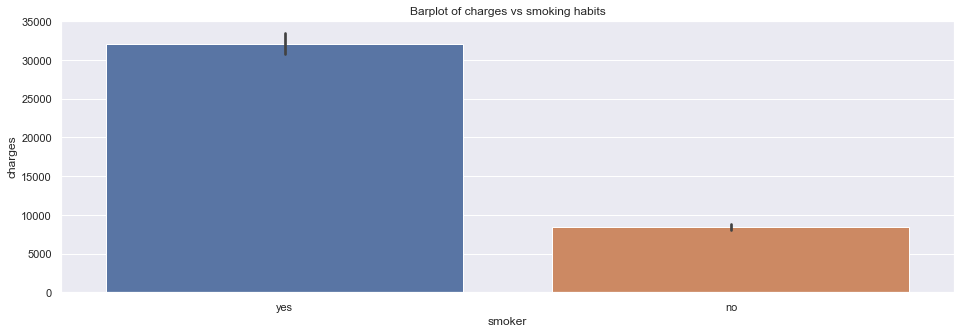

In [19]:
print("\nThe sample mean of charges among smokers and that among non-smokers:")
print(insurance.groupby(['smoker'])['charges'].mean().round(decimals=1))
print("\nThe sample standard deviation of charges among smokers and that among non-smokers:")
print(insurance.groupby(['smoker'])['charges'].std(ddof=1).round(decimals=1))

varTestResult = stats.levene(insurance[insurance['smoker']=='yes']['charges'], insurance[insurance['smoker']=='no']['charges'])
print("\np-value for Levene's test is", fmtNum(varTestResult.pvalue, 4))
if(varTestResult.pvalue < 0.05):
    print('\nSo variances of charges are significantly different between smokers and non-smokers at 5% level of significance.')
    print("\nUsing Welch's t-test ...")
    diffTestResult = stats.ttest_ind(a=insurance[insurance['smoker']=='yes']['charges'], b=insurance[insurance['smoker']=='no']['charges'], equal_var=False)
    print("p-value for Welch's t-test is", fmtNum(diffTestResult.pvalue, 4))
    if(diffTestResult.pvalue < 0.05) :
        print("\nConclusion: Average charges of smokers and non-smokers are significantly different at 5% level of significance.")
    else:
        print("\nConclusion: Average charges of smokers and non-smokers are NOT significantly different at 5% level of significance.")
else:
    print('\nSo variances of charges are NOT significantly different between two groups of smokers, viz., smokers and non-smokers at 5% level of significant.')
    print("\nUsing two-sample (independent) t-test ...")
    diffTestResult = stats.ttest_ind(a=insurance[insurance['smoker']=='yes']['charges'], b=insurance[insurance['smoker']=='no']['charges'], equal_var=True)
    print("p-value for two-sample (independent) t-test is", fmtNum(diffTestResult.pvalue, 4))
    if(diffTestResult.pvalue < 0.05) :
        print("\nConclusion: Average charges of smokers and non-smokers are significantly different at 5% level of significance.")
    else:
        print("\nConclusion: Average charges of smokers and non-smokers are NOT significantly different at 5% level of significance.")

# Test result specific note:
print("\nNB: The p-value for both Levene's test and Welch's t-test of unequal variance are significantly small indicating...")
print("a) There is a strong evidence of difference of variability between groups even at 1% level of significance.")
print("b) There is a strong evidence that the average charges between smokers and non-smokers are significantly different even at 1% level of significance.")

print('\nThe chart below demonstrates and reconfirms the average charges are significantly different between smokers and non-smokers, with error bars well apart for smokers and non-smokers.')
plt.figure(figsize=(16,5))
barplt = sns.barplot(x='smoker', y='charges', data=insurance).set_title('Barplot of charges vs smoking habits')

#### 4b) Does BMI of males differ significantly from that of females?
**Approach**: We can compare the average BMI for males and females, and test if the difference is statistically different from 0 at a given level of significance (say, 5%). Thus, two (independent) sample t-test would be a relevant option and it will be a two-tailed test.

However, before we go for independent sample t-test, we can test whether the variability in BMI between males and females differs significantly using Levene's test and then use standard independent t-test (if variances are **not** significantly different) or Welch's t-test (if variances are significantly different).

The hypothsis for the question under consideration:
- Null Hypothesis ($H_{0}$): There is no statistically significant difference in BMI between males and females.
- Alternative Hypothesis ($H_{A}$): There is a statistically significant difference in BMI between males and females.


The sample mean BMI among males and that among females:
sex
female    30.38
male      30.94
Name: bmi, dtype: float64

The sample standard deviation of BMI among males and that among females:
sex
female    6.05
male      6.14
Name: bmi, dtype: float64

p-value for Levene's test is 0.95

So variances of BMI are NOT significantly different between males and females at 5% level of significance.

Using two-sample (independent) t-test ...
p-value for two-sample (independent) t-test is 0.09

Conclusion: Average BMI between males and females are NOT significantly different at 5% level of significance.

The chart below demonstrates and reconfirms the average BMI are not very different between males and females, with error bars overlapping well for males and females.


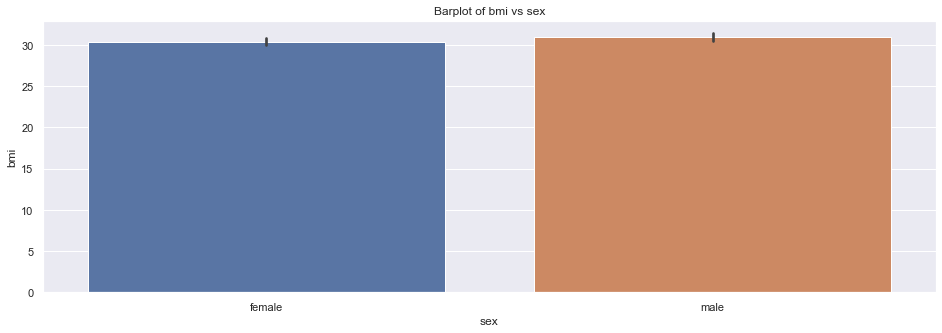

In [20]:
print("\nThe sample mean BMI among males and that among females:")
print(insurance.groupby(['sex'])['bmi'].mean().round(decimals=2))
print("\nThe sample standard deviation of BMI among males and that among females:")
print(insurance.groupby(['sex'])['bmi'].std(ddof=1).round(decimals=2))

varTestResult = stats.levene(insurance[insurance['sex']=='male']['bmi'], insurance[insurance['sex']=='female']['bmi'])
print("\np-value for Levene's test is", fmtNum(varTestResult.pvalue, 4))
if(varTestResult.pvalue < 0.05):
    print('\nSo variances of BMI are significantly different between males and females at 5% level of significance.')
    print("\nUsing Welch's t-test ...")
    diffTestResult = stats.ttest_ind(a=insurance[insurance['sex']=='male']['bmi'], b=insurance[insurance['sex']=='female']['bmi'], equal_var=False)
    print("p-value for Welch's t-test is", fmtNum(diffTestResult.pvalue, 4))
    if(diffTestResult.pvalue < 0.05) :
        print("\nConclusion: Average BMI between males and females are significantly different at 5% level of significance.")
    else:
        print("\nConclusion: Average BMI between males and females are NOT significantly different at 5% level of significance.")
else:
    print('\nSo variances of BMI are NOT significantly different between males and females at 5% level of significance.')
    print("\nUsing two-sample (independent) t-test ...")
    diffTestResult = stats.ttest_ind(a=insurance[insurance['sex']=='male']['bmi'], b=insurance[insurance['sex']=='female']['bmi'], equal_var=True)
    print("p-value for two-sample (independent) t-test is", fmtNum(diffTestResult.pvalue, 4))
    if(diffTestResult.pvalue < 0.05) :
        print("\nConclusion: Average BMI between males and females are significantly different at 5% level of significance.")
    else:
        print("\nConclusion: Average BMI between males and females are NOT significantly different at 5% level of significance.")

print('\nThe chart below demonstrates and reconfirms the average BMI are not very different between males and females, with error bars overlapping well for males and females.')
plt.figure(figsize=(16,5))
barplt = sns.barplot(x='sex', y='bmi', data=insurance).set_title('Barplot of bmi vs sex')

#### 4c) Is the proportion of smokers significantly different in different genders?
**Approach**: As we need to test for the equality of the proportion of frequencies through contingency tables of two nominal categorical variables, Pearson's Chi-Squared test would be a suitable choice.

The hypthesis to test in order to answer the question under consideration:
- Null Hypothesis ($H_{0}$): There is no statistically significant difference in proportion of smokers between males and females.
- Alternative Hypothesis ($H_{A}$): There is statistically significant difference in proportion of smokers between males and females.

In [21]:
print("\nFrequency distribution (contingency table) by sex and smoker:")
contTable = pd.crosstab(index=insurance['sex'], columns=insurance['smoker'])
print(contTable)

print("\nPearson's Chi-Squared test with Yates' correction:")
chisqstat, pval, df, f_exp = stats.chi2_contingency(contTable, correction=True)
print("p-value is", fmtNum(pval, 4))

if pval < 0.05:
    print("\nConclusion: Reject Null Hypothesis in favour of Alternative Hypothesis that there is statistically significant difference in proportion of smokers between males and females at 5% level of significance.")
else:
    print("\nConclusion: Fail to reject Null Hypothesis and that there is NO significant difference in proportion of smokers between males and females at 5% level of significance.")

# Test result specific note:
print("\nNB: The p-value for the test is well below 1% with Yates' correction and hence proportions of smokers between males and females are significantly different even at 1% level of significance.")


Frequency distribution (contingency table) by sex and smoker:
smoker   no  yes
sex             
female  547  115
male    517  159

Pearson's Chi-Squared test with Yates' correction:
p-value is 0.0065

Conclusion: Reject Null Hypothesis in favour of Alternative Hypothesis that there is statistically significant difference in proportion of smokers between males and females at 5% level of significance.

NB: The p-value for the test is well below 1% with Yates' correction and hence proportions of smokers between males and females are significantly different even at 1% level of significance.


#### 4d) Is the distribution of bmi across women with no children, one child and two children, the same?
**Approach**: As we need to test whether the distribution of BMI across women having no child, 1 child and 2 children, the same or not, we can start with **visualization**, viz., *looking at boxplot, density plot, empirical CDF plot*
of BMI grouped by women with no child, 1 child and 2 children categories. 

To statistically draw conclusion for comparability of distributions, we can use **one-way ANOVA test** to test if at least one group mean BMI is significantly different from the other groups, or not. *Assumptions for applicability of ANOVA (i.e., independence of grouped samples, normality, homogeneity of variance of BMI within groups) can be tested before using it.* In addition, we can use **Levene's test** to test if at least one group has a significantly different BMI variance from the other groups, or not.

If either of the null hypothesis for ANOVA test or for Levene's test is rejected, i.e., either group mean BMIs or group variance BMIs are significantly different, we may conclude underlying groups don't come from the same distribution.

If any of the ANOVA assumptions are not met, we can alternatively use one-way ANOVA equivalent non-parametric test, i.e., Kruskal-Wallis test that compares median BMI of the groups.

Hypothesis for group mean comparison using one-way ANOVA:
- Null Hypothesis ($H_{0}$): The group mean BMIs are not significantly different from each other.
- Alternative Hypothesis ($H_{A}$): At least one group mean BMI is significantly different from the other groups.

Hypothesis for group variance comparison using Levene's test:
- Null Hypothesis ($H_{0}$): Variances in BMIs across groups are not significantly different from each other.
- Alternative Hypothesis ($H_{A}$): At least one group has significantly different variance in BMI from the other groups.


Visualization Insights:
Boxplot shows the overall spread, median and quantiles of BMI are very similar across three groups of women; the median BMI for women with 2 children looks marginally higher relative to the other two groups.

Kernel density estimate plot for BMI across three groups of women reveal a very similar distribution of BMI for groups of women having no child and 1 child; while BMI of women with 2 children have slightly higher BMI.
Moreover, the BMI density plots for each of the three groups look to have near-normal distribution.

Empirical CDF of BMI for three groups of women look to match each other very closely providing an evidence that the distribution of the three groups don't seem to be different visually.


Plots comparing BMI within groups of women having no child, 1 child and 2 children


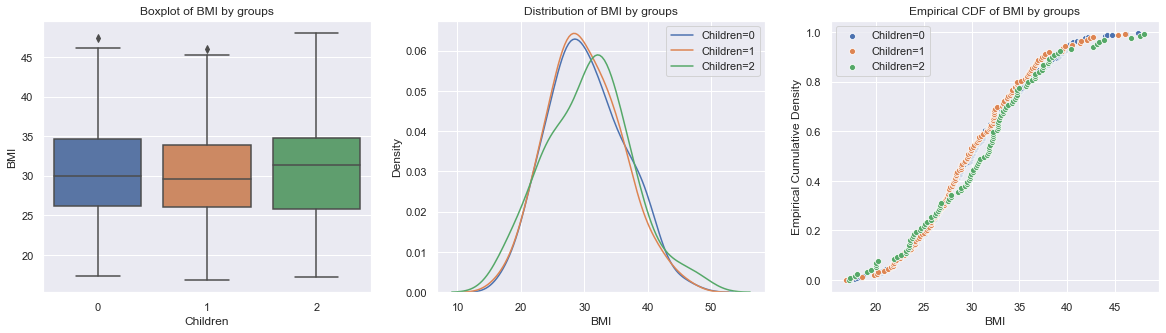

In [22]:
#***************************************************************************************************************
# 4d) Part 1: Visualization of distribution of BMI within groups of female with no child, 1 child and 2 children
#***************************************************************************************************************
subData = insurance[(insurance['sex']=='female') & ((insurance['children']==0) | (insurance['children']==1) | (insurance['children']==2))][['children', 'bmi']]

child0bmi = subData[subData['children'] == 0]['bmi']
child1bmi = subData[subData['children'] == 1]['bmi']
child2bmi = subData[subData['children'] == 2]['bmi']
               
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(x=subData['children'], y=subData['bmi'], ax=ax[0])
ax[0].set_ylabel('BMI')
ax[0].set_xlabel('Children')
ax[0].set_title('Boxplot of BMI by groups')

sns.distplot(child0bmi, hist=False, kde=True, label='Children=0', ax=ax[1])
sns.distplot(child1bmi, hist=False, kde=True, label='Children=1', ax=ax[1])
sns.distplot(child2bmi, hist=False, kde=True, label='Children=2', ax=ax[1])
ax[1].set_ylabel('Density')
ax[1].set_xlabel('BMI')
ax[1].set_title('Distribution of BMI by groups')

sns.scatterplot(x=ecdf(child0bmi)[0], y=ecdf(child0bmi)[1], label='Children=0', ax=ax[2])
sns.scatterplot(x=ecdf(child1bmi)[0], y=ecdf(child1bmi)[1], label='Children=1', ax=ax[2])
sns.scatterplot(x=ecdf(child2bmi)[0], y=ecdf(child2bmi)[1], label='Children=2', ax=ax[2])
ax[2].set_ylabel('Empirical Cumulative Density')
ax[2].set_xlabel('BMI')
ax[2].set_title('Empirical CDF of BMI by groups')

print('\nVisualization Insights:\nBoxplot shows the overall spread, median and quantiles of BMI are very similar across three groups of women; the median BMI for women with 2 children looks marginally higher relative to the other two groups.')
print('\nKernel density estimate plot for BMI across three groups of women reveal a very similar distribution of BMI for groups of women having no child and 1 child; while BMI of women with 2 children have slightly higher BMI.')
print('Moreover, the BMI density plots for each of the three groups look to have near-normal distribution.')
print("\nEmpirical CDF of BMI for three groups of women look to match each other very closely providing an evidence that the distribution of the three groups don't seem to be different visually.")
print('\n\nPlots comparing BMI within groups of women having no child, 1 child and 2 children')


Looking at QQ plot to compare individual groups with Normal distribution visually:
Insight: Distribution of the sample groups look very similar to Normal.


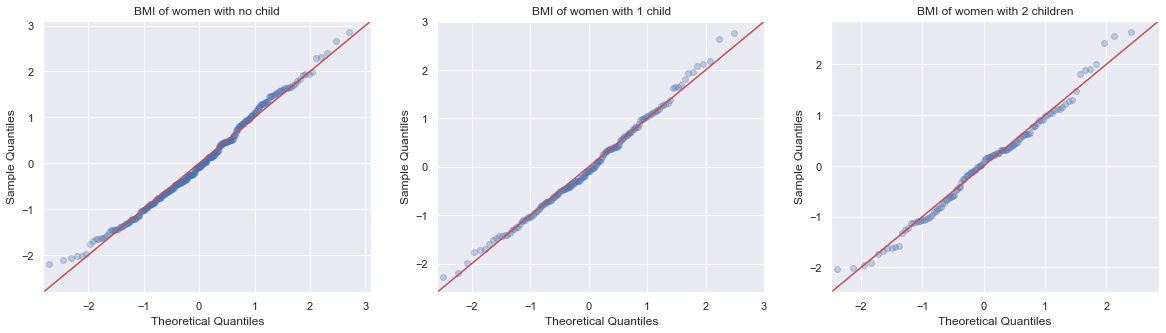


a) Test for Normality of individual groups

Normality test for the samples from three groups (Shapiro's test):
p-value for Shapiro's test:
No child group: 0.0376 
1 child group: 0.5362 
2 children group: 0.2596
Test conclusion: Distribution of BMI for women with 1 child and those with 2 children are close to Normal distribution as p-values are large enough (~0.54 and ~0.26 respectively). However, BMIs for the group of women with no child are marginally different from Normal distribution at 5% level of significance (and, not different from Normal dist. at 1% level of significance, p-value~0.04).

Kolmogorov-Smirnov (KS) test to compare groups' distribution with Normal distribution:
p-value for KS test:
No child group: 0.4339 
1 child group: 0.8341 
2 children group: 0.8945
Test conclusion: We can't reject the hypothesis that distribution of BMI for women with no child, 1 child and 2 children follow Normal distribution at 5% level of significance.

b) Test for homogeneity of variances a

In [23]:
#****************************************************************************************************************************************
# 4d) Part 2: Test statistically if distribution of BMI among groups of female with no child, 1 child and 2 children significantly differ
#****************************************************************************************************************************************
# Test for validity of assumptions for ANOVA one-way test:
print('\nLooking at QQ plot to compare individual groups with Normal distribution visually:')
print('Insight: Distribution of the sample groups look very similar to Normal.')
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
qqplt0 = sm.qqplot(data=(child0bmi-child0bmi.mean())/child0bmi.std(ddof=1), dist=stats.norm, loc=0, scale=1, line='45', ax=ax[0])
ax[0].set_title('BMI of women with no child')
qqplt1 = sm.qqplot(data=(child1bmi-child1bmi.mean())/child1bmi.std(ddof=1), dist=stats.norm, loc=0, scale=1, line='45', ax=ax[1])
ax[1].set_title('BMI of women with 1 child')
qqplt2 = sm.qqplot(data=(child2bmi-child2bmi.mean())/child2bmi.std(ddof=1), dist=stats.norm, loc=0, scale=1, line='45', ax=ax[2])
ax[2].set_title('BMI of women with 2 children')
dots = fig.findobj(lambda x: hasattr(x, 'get_color') and x.get_color() == 'b') #grab blue dotted figures to format
[d.set_alpha(0.3) for d in dots]
plt.show()

print("\na) Test for Normality of individual groups")
print("\nNormality test for the samples from three groups (Shapiro's test):")
c0Shapiro = stats.shapiro(child0bmi)
c1Shapiro = stats.shapiro(child1bmi)
c2Shapiro = stats.shapiro(child2bmi)
print("p-value for Shapiro's test:\nNo child group:", fmtNum(c0Shapiro[1],4), "\n1 child group:", fmtNum(c1Shapiro[1],4), "\n2 children group:", fmtNum(c2Shapiro[1],4))
print("Test conclusion: Distribution of BMI for women with 1 child and those with 2 children are close to Normal distribution as p-values are large enough (~0.54 and ~0.26 respectively). However, BMIs for the group of women with no child are marginally different from Normal distribution at 5% level of significance (and, not different from Normal dist. at 1% level of significance, p-value~0.04).")

print("\nKolmogorov-Smirnov (KS) test to compare groups' distribution with Normal distribution:")
c0KS = stats.kstest(rvs=(child0bmi-child0bmi.mean())/child0bmi.std(ddof=1), cdf='norm', alternative='two-sided')
c1KS = stats.kstest(rvs=(child1bmi-child1bmi.mean())/child1bmi.std(ddof=1), cdf='norm', alternative='two-sided')
c2KS = stats.kstest(rvs=(child2bmi-child2bmi.mean())/child2bmi.std(ddof=1), cdf='norm', alternative='two-sided')
print("p-value for KS test:\nNo child group:", fmtNum(c0KS[1],4), "\n1 child group:", fmtNum(c1KS[1],4), "\n2 children group:", fmtNum(c2KS[1],4))
print("Test conclusion: We can't reject the hypothesis that distribution of BMI for women with no child, 1 child and 2 children follow Normal distribution at 5% level of significance.")

print("\nb) Test for homogeneity of variances across groups (Levene's test)")
leveneResult = stats.levene(child0bmi, child1bmi, child2bmi)
print("p-value for Levene's test:", fmtNum(leveneResult.pvalue,4))
print("Test conclusion: Based on sample data, there is no statistical evidence that the variance of BMI for the three groups of women are significantly different from each other, i.e., it is reasonable to assume homogeneity of variance for the three groups at 5% level of significance.")

print("\nc) The three samples of women with no child, 1 child and 2 children can be assumed to be independent since BMI of one group can't affect the BMI of the other group in any way.")

# Using one-way ANOVA to test equality of group means
print("\nThus underlying assumptions for one-way ANOVA test are resonably satisfied. Moving on to test one-way ANOVA ...")
anovaResult = stats.f_oneway(child0bmi,child1bmi,child2bmi)
print("p-value for one-way ANOVA:", fmtNum(anovaResult.pvalue, 4))
print("Test conclusion: Based on the sample data, there is no statistical evidence that the mean BMI for groups of women with no child, 1 child and 2 children are significantly different at 5% level of significance.")

#alternative approach of ANOVA test - reaches same conclusion...
#from statsmodels.formula.api import ols
#model = ols('bmi ~ C(children)', data=subData).fit()
#anova_tbl = sm.stats.anova_lm(model, typ=2)
#pval=anova_tbl['PR(>F)'][0]

print("\nIn addition, I'd like to test for the equality of group medians using Kruskal-Wallis test. Being it a non-parametric test, this doesn't depend on any assumptions to be satisfied apriori. The sample sizes are large enough to apply this test.")
print("Kruskal-Wallis H test for equality of group medians:")
KWResult = stats.kruskal(child0bmi, child1bmi, child2bmi)
print("p-value for Kruskal Wallis H test:", fmtNum(KWResult.pvalue,4))
print("Test conclusion: We cannot reject the hypothesis that medians of BMI for three groups of women (0,1 and 2 children) are not significantly different at 5% level of significance. In fact, p-value is large enough that we can conclude the median values for the three groups are very similar.")

print("\nFinal conclusion: Given the sample of three groups of women with no child, 1 child and 2 children, there is no statistical evidence that the distribution of these groups are significantly different from each other at 5% level of significance.")

## <center><font color='green'>*******End of Project Solution*******</font></center>